In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

In [4]:
for expression in os.listdir("D:/download/gender_dataset/train/"):
    print(str(len(os.listdir("D:/download/gender_dataset/train/"+expression)))+" "+expression+" "+"images")

1005 man images
966 woman images


In [5]:
img_size=96
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("D:/download/gender_dataset/train/",target_size=(img_size,img_size),color_mode="rgb",batch_size=batch_size,class_mode='categorical',shuffle=True)
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_validation.flow_from_directory("D:/download/gender_dataset/test/",target_size=(img_size,img_size),color_mode="rgb",batch_size=batch_size,class_mode='categorical',shuffle=False)


Found 1971 images belonging to 2 classes.
Found 336 images belonging to 2 classes.


In [25]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding="same", input_shape=(96,96,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))



model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(2))
model.add(Activation("sigmoid"))

opt=Adam(lr=0.001,decay=0.001/50)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 96, 96, 32)        896       
_________________________________________________________________
activation_47 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_48 (Activation)   (None, 32, 32, 64)       

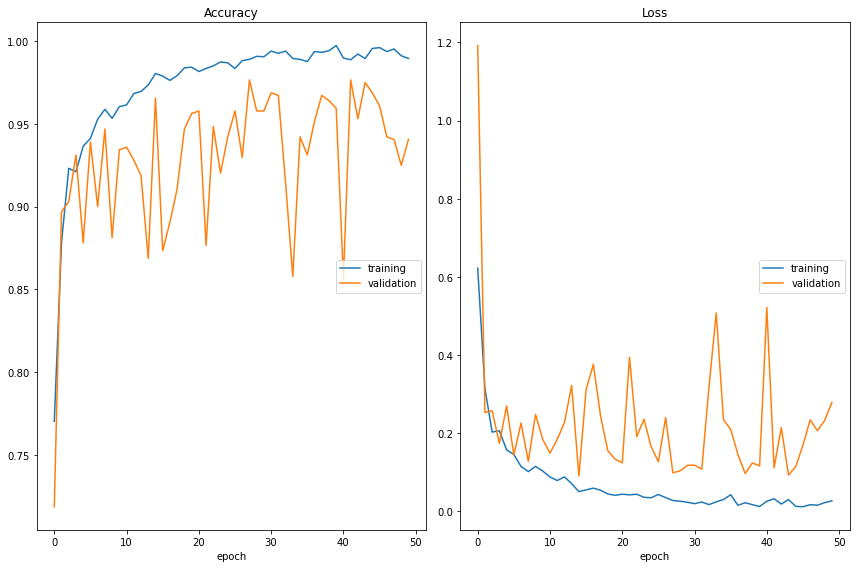

Accuracy
	training         	 (min:    0.770, max:    0.997, cur:    0.990)
	validation       	 (min:    0.719, max:    0.977, cur:    0.941)
Loss
	training         	 (min:    0.012, max:    0.623, cur:    0.027)
	validation       	 (min:    0.091, max:    1.192, cur:    0.279)

Epoch 00050: saving model to gender_weights2.h5
30/30 [==============================] - 58s 2s/step - loss: 0.0272 - acc: 0.9895 - val_loss: 0.2787 - val_acc: 0.9406


In [26]:
epochs=50
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size
checkpoint=ModelCheckpoint("gender_weights2.h5",monitor="val_accuracy",save_weights_only=False,mode='max',verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.001,model='auto')
callbacks=[PlotLossesKeras(),checkpoint,reduce_lr]
history=model.fit(x=train_generator,steps_per_epoch=steps_per_epoch,
                 epochs=epochs,validation_data=validation_generator,validation_steps=validation_steps,callbacks=callbacks)

In [ ]:
# model.add(Conv2D(64, (3,3), padding="same"))
# model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))



#model.add(Conv2D(128, (3,3), padding="same"))
#model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))